# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [206]:
ds_bc2 = pd.read_csv("bc2.csv")
ds_bc2.sample(n=10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
435,1294562,10,8,10,1,3,10,5,1,1,4
497,1182404,4,2,1,1,2,1,1,1,1,2
82,1143978,5,2,1,1,2,1,3,1,1,2
457,1259008,8,8,9,6,6,3,10,10,1,4
105,1169049,7,3,4,4,3,3,3,2,7,4
127,1177027,3,1,1,1,2,1,3,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4
514,1306282,6,6,7,10,3,10,8,10,2,4
690,654546,1,1,1,3,2,1,1,1,1,2
224,1227210,10,5,5,6,3,10,7,9,2,4


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [207]:
ds_bc2.shape

(699, 11)

In [208]:
ds_bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [209]:
ds_bc2.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [210]:
ds_bc2.describe(include='all')['Bare Nuclei']['top']

'1'

#### Check Missing Values

In [211]:
ds_bc2.isna().any()

ID                             False
ClumpThickness                 False
Cell Size                      False
Cell Shape                     False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Normal Nucleoli                False
Bland Chromatin                False
Mitoses                        False
Class                          False
dtype: bool

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [212]:
#print('Number of "?" in "Bare Nuclei" :',ds_bc2['Bare Nuclei'].count() - ds_bc2['Bare Nuclei'][ds_bc2['Bare Nuclei'] == '?'].count())

In [213]:
print('Number of "?" in "Bare Nuclei" :', ds_bc2['Bare Nuclei'][ds_bc2['Bare Nuclei'] == '?'].count())

Number of "?" in "Bare Nuclei" : 16


#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [214]:
#Replacing ? with top value of 'Bare Nuclei'
ds_bc2.replace(to_replace='?', value=ds_bc2.describe(include='all')['Bare Nuclei']['top'], inplace=True)

In [215]:
# Verify if the replacement is effective...Value printed here should be 0
print('Number of "?" in "Bare Nuclei" :', ds_bc2['Bare Nuclei'][ds_bc2['Bare Nuclei'] == '?'].count())

Number of "?" in "Bare Nuclei" : 0


### Question 5
#### Find the distribution of target variable (Class) 

In [216]:
ds_bc2.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

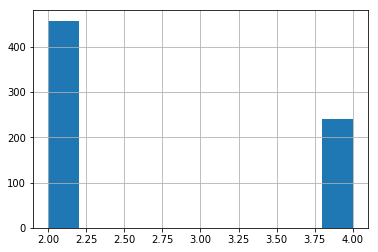

In [217]:
ds_bc2['Class'].hist()

#### Convert the datatype of Bare Nuclei to `int`

In [218]:
#Converting the Feature 'BAre Nuclei' to int
ds_bc2['Bare Nuclei'] = pd.to_numeric(ds_bc2['Bare Nuclei'])

In [219]:
ds_bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

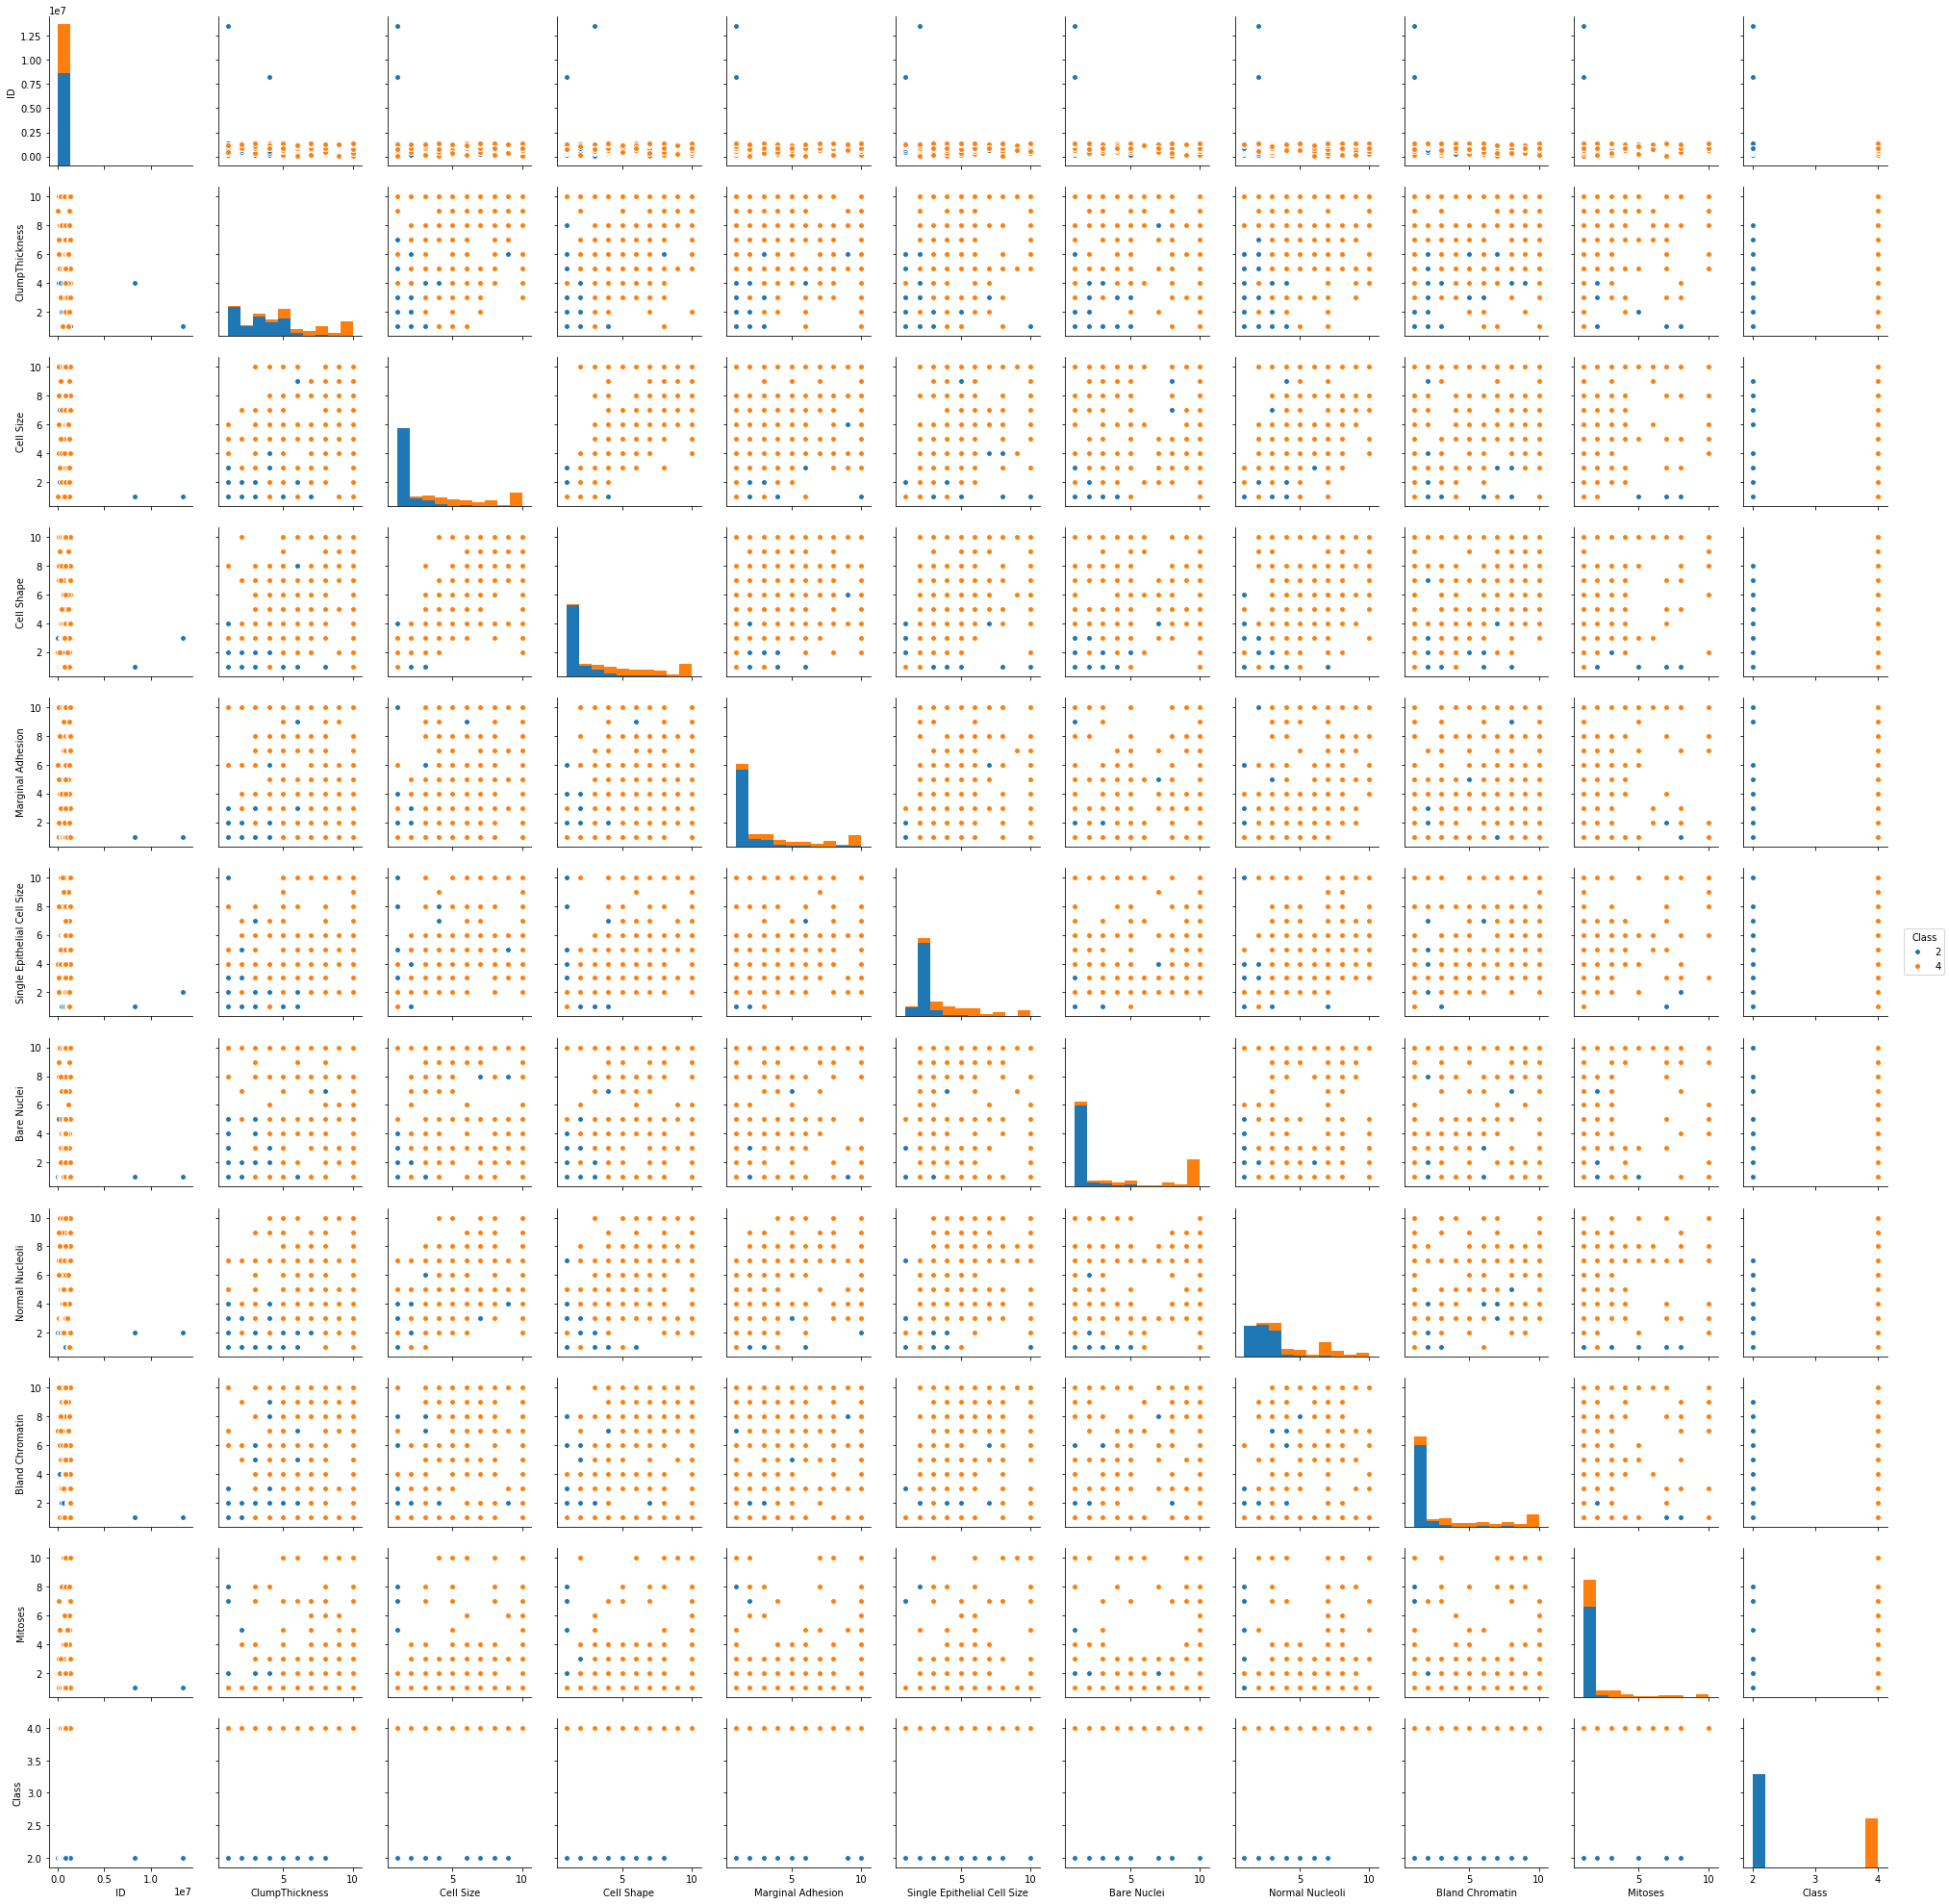

In [220]:
sns.pairplot(ds_bc2, hue='Class')

In [221]:
ds_bc2.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [222]:
# Dropping the feature 'Cell Shape', as Cell Size also conveys the same. Shape determines Size
ds_bc2.drop(columns='Cell Shape', inplace=True)
ds_bc2.drop(columns='ID', inplace=True)

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [223]:
X = ds_bc2.drop(columns='Class')
y = ds_bc2.Class
print('Features : ', X.columns)
print('Target :', y.name)

Features :  Index(['ClumpThickness', 'Cell Size', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')
Target : Class


#### Divide the Training and Test sets in 70:30 

In [224]:
''' 
 ******************** ASSUMPTION ***********************
Not using any data and splitting the data once, with a random value for 'random_state'
Further questions talk only about 'K' and not random_state, and Scaling it just once
'''

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [225]:
print("Training Data Shape :",X_train.shape)
print("Testing Data Shape :",X_test.shape)

Training Data Shape : (489, 8)
Testing Data Shape : (210, 8)


## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [226]:
sc = StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [227]:
neighbors = [3,5,9]
print(neighbors)

[3, 5, 9]


In [228]:
neighbors = [3,5,9]
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    y_pred = knn.predict(scaledX_test)
    print("Accurancy Score for K = ",k)
    print(accuracy_score(y_test, y_pred))

Accurancy Score for K =  3
0.9666666666666667
Accurancy Score for K =  5
0.9714285714285714
Accurancy Score for K =  9
0.9714285714285714


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [229]:
neighbors = np.arange(1,19,step=2)
print(neighbors)

[ 1  3  5  7  9 11 13 15 17]


In [230]:
neighbors = np.arange(1, 19, step=2)

score_array = np.empty(len(neighbors))
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    y_pred = knn.predict(scaledX_test)
    print("Accurance score for K = {} is ==> {}".format(k,accuracy_score(y_test, y_pred)))
    #Using Accuracy Score
    score_array[i] = accuracy_score(y_test, y_pred)
    #Compute accuracy on the training set
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test)

Accurance score for K = 1 is ==> 0.9571428571428572
Accurance score for K = 3 is ==> 0.9666666666666667
Accurance score for K = 5 is ==> 0.9714285714285714
Accurance score for K = 7 is ==> 0.9714285714285714
Accurance score for K = 9 is ==> 0.9714285714285714
Accurance score for K = 11 is ==> 0.9666666666666667
Accurance score for K = 13 is ==> 0.9714285714285714
Accurance score for K = 15 is ==> 0.9714285714285714
Accurance score for K = 17 is ==> 0.9714285714285714


In [231]:
print("Optimal Number found for K @ : ", neighbors[np.where(score_array == np.amax(score_array))[0][0]])

Optimal Number found for K @ :  5


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

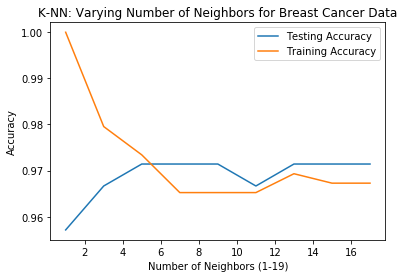

In [232]:
# Generate plot
plt.title('K-NN: Varying Number of Neighbors for Breast Cancer Data')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors (1-19)')
plt.ylabel('Accuracy')
plt.show()